![](https://images.shiksha.com/mediadata/images/articles/1583929585phpSip48r.jpeg)

Hello!!!. We will try to find out insights from the data and figure out which factors are resposnsible for a student to get placed. We will find out answers of many questions:-
*  Does Gender affect for getting placed?
*  Which stream students are getting more placed and which stream students are mostly not placed?
*  Does marks really matter?
*  Students from which degree and specialisation are getting placed

And we will fit logistic regression and random forest to data to predict whether a student will get placed or not.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [93]:
df=pd.read_csv('placement_data.csv')

In [94]:
df.drop(['sl_no'],axis=1,inplace=True)

In [95]:
df['status'].values[df['status']=='Not Placed'] = 0 
df['status'].values[df['status']=='Placed'] = 1
df.status = df.status.astype('int')

In [96]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


   #  Drawing insights

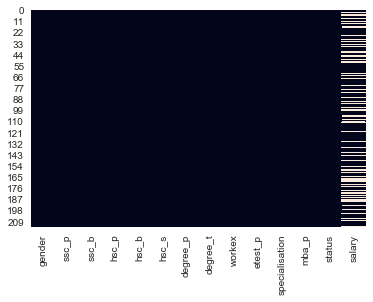

In [97]:
sns.heatmap(df.isnull(), cbar=False) #finding columns having nan values

In [9]:
df['salary'] = df['salary'].replace(np.nan, 0) #Replace Nan with 0

In [10]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


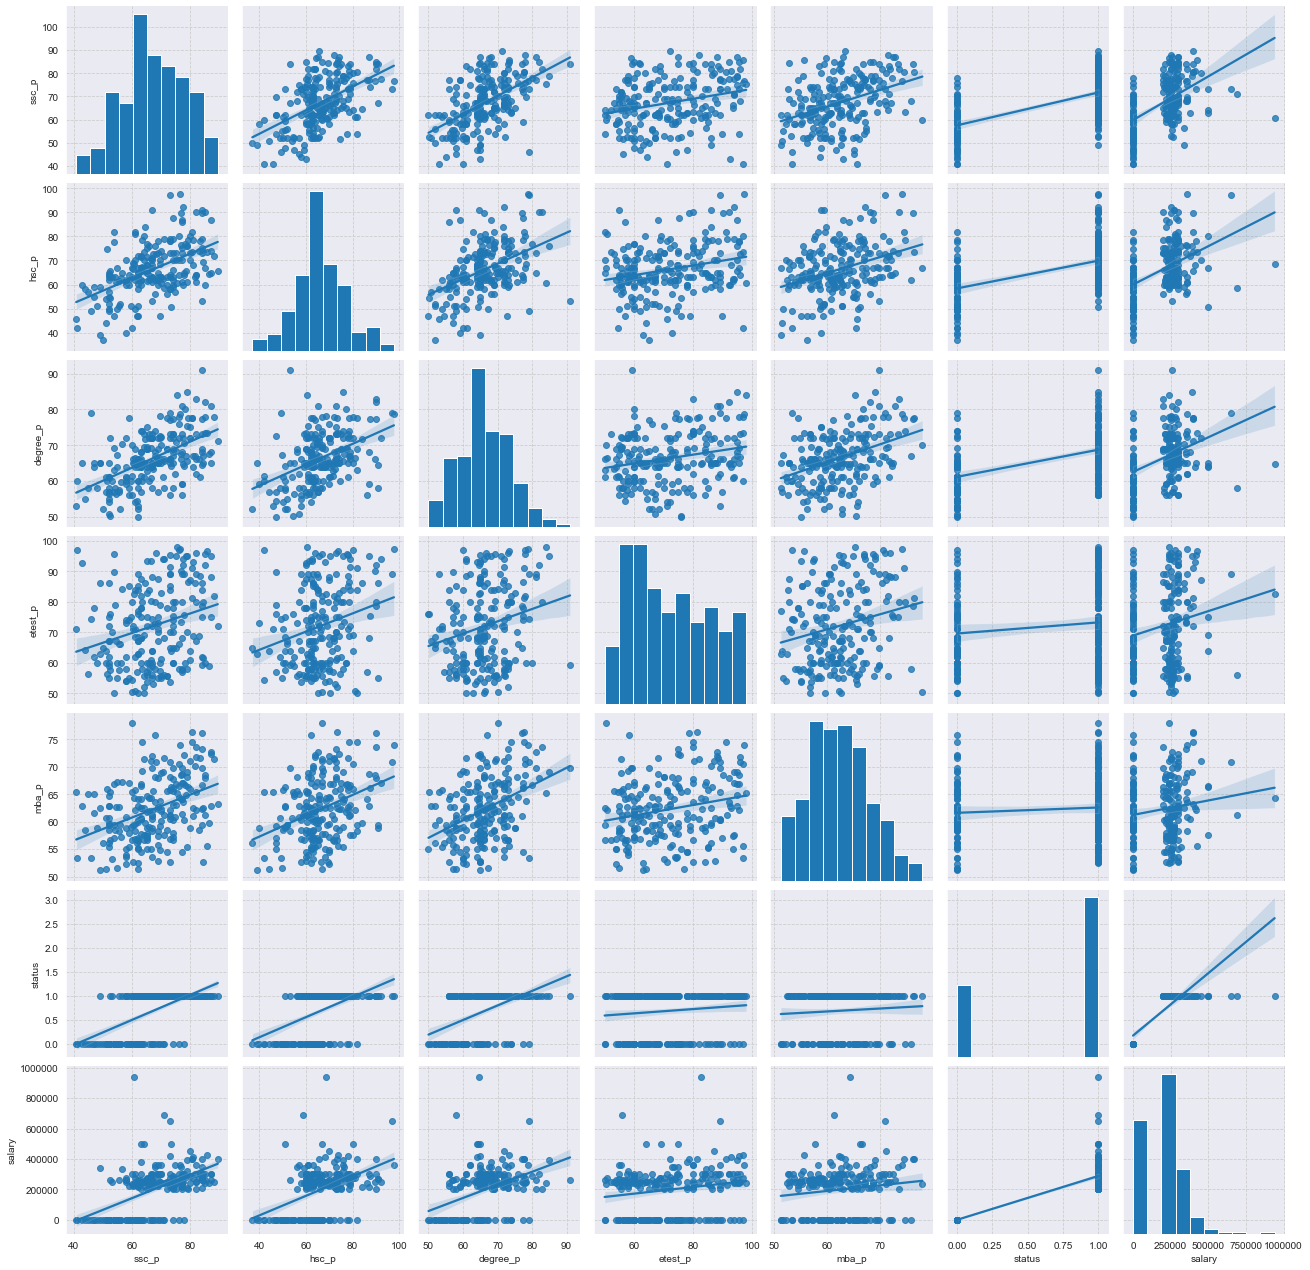

In [31]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.pairplot(df,kind='reg')
plt.show()

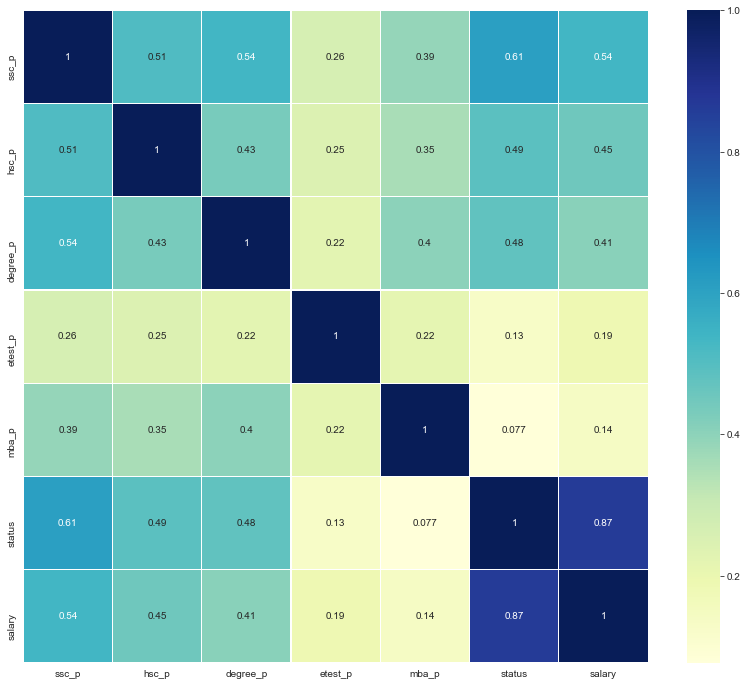

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)
plt.show()

Surprisingly MBA percenrage and E-test precentage are the least significant variable that affect the placement outcome.

Lets explore more!!

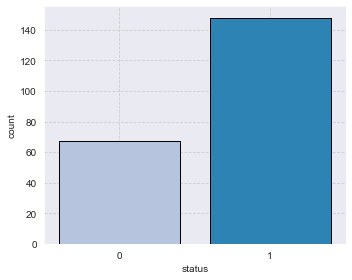

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(df['status'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

About 2 times more students got placed as compared to not placed.

## Significance of Gender

Lets See whether Gender plays any significant role or not

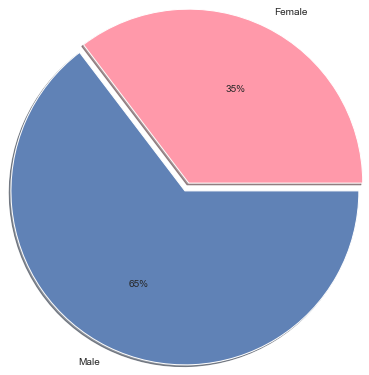

In [26]:
out_df=pd.DataFrame(df.groupby('gender')['gender'].count())
colors = ['#ff99aa','#6082B6']
plt.pie(out_df['gender'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

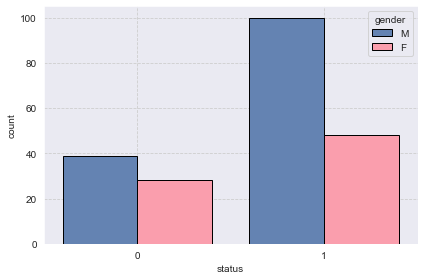

In [39]:
sns.countplot(df['status'],hue=df['gender'],palette= ['#6082B6','#ff99aa'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [40]:
Boys_placed=100
Total_Boys=140
Boys_placed_prop=Boys_placed/Total_Boys


Girls_placed=50
Total_Girls=70
Girls_placed_prop=Girls_placed/Total_Girls

print('Proportion of boys got placed: ') , 
print(Boys_placed_prop)

print('\nProportion of girls got placed: ') , 
print(Girls_placed_prop)


Proportion of boys got placed: 
0.7142857142857143

Proportion of girls got placed: 
0.7142857142857143


1. From the above plots we see that Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50.
2. Total number girls not placed are 30 and Total number of boys not placed are 40
3. But proportion of getting placed is same for both, i.e 71% . Therefore **Gender DOESN'T MATTER** for getting placed. 


## Significance of Marks

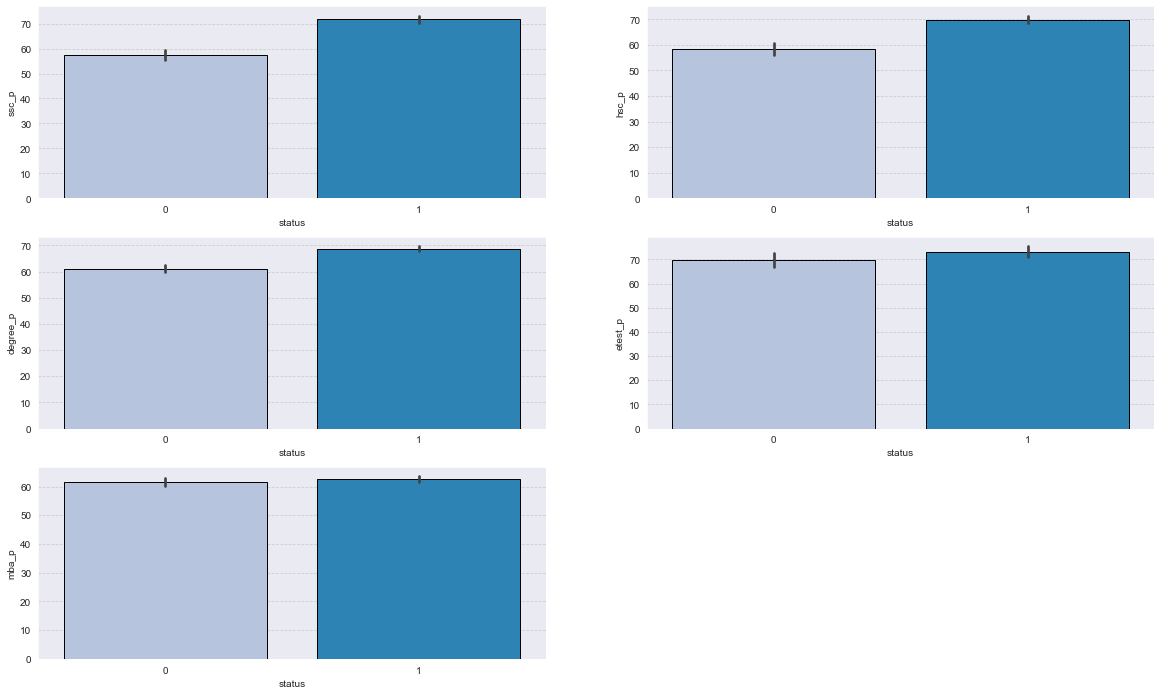

In [42]:
fig,axes = plt.subplots(3,2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df, ax=axes[0][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='hsc_p', data=df, ax=axes[0][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='degree_p',data=df, ax=axes[1][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='etest_p',data=df, ax=axes[1][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='mba_p', data=df, ax=axes[2][0],palette='PuBu',saturation=0.9,edgecolor="black")
fig.delaxes(ax = axes[2][1]) 

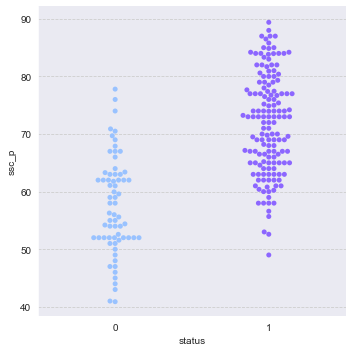

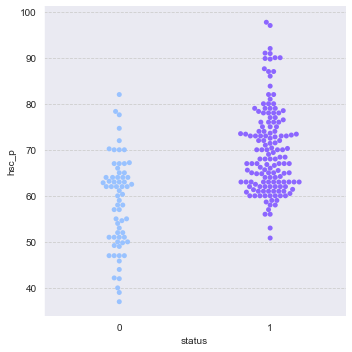

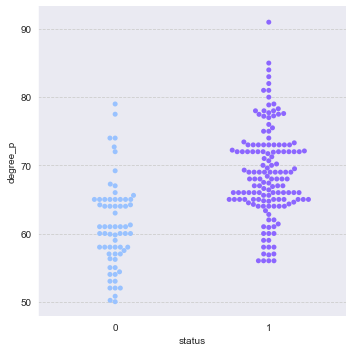

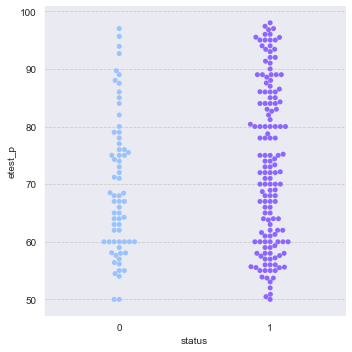

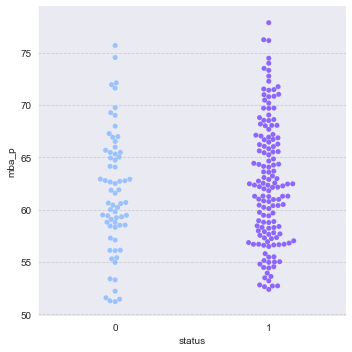

In [130]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="etest_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="mba_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
plt.show()

1. The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed. So Yes, Percentage matter for placement as we have seen from the HeatMap in previous section.
2. But, Higher Percentage necessarily doesn't guarantee a Placement.
3. etest and MBA percentage doesn't matter.


## Significance of work experience

In [45]:
df.groupby(['workex','status']).count()['salary']

workex  status
No      0         57
        1         84
Yes     0         10
        1         64
Name: salary, dtype: int64

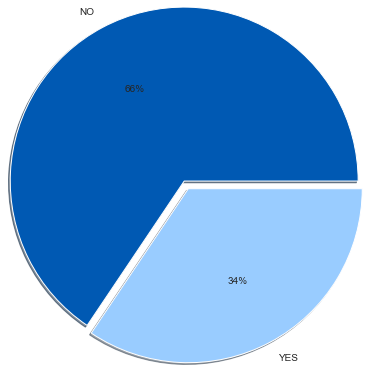

In [49]:
#to see the composition of work experience
out_df=pd.DataFrame(df.groupby('workex')['workex'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['workex'],labels=['NO','YES'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

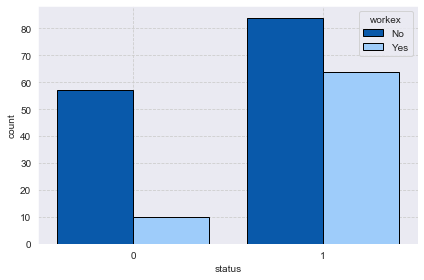

In [58]:
sns.countplot(df['status'],hue=df['workex'],palette= ['#0059b3','#99ccff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [53]:
Y_placed=64
Total_Y=74
Y_placed_prop=Y_placed/Total_Y


N_placed=84
Total_N=141
N_placed_prop=N_placed/Total_N

print('Proportion of student with work experience got placed: ') , 
print(Y_placed_prop)

print('\nProportion of students with No work experience got placed: ') , 
print(N_placed_prop)


Proportion of student with work experience got placed: 
0.8648648648648649

Proportion of students with No work experience got placed: 
0.5957446808510638


From above we can infere that:- 
 * Students having work experience are more likely to get placed (86%).
 * 59% of studnets having no work experience got selected.  

**Therefore having work experience will help you for getting placed**

## Signifiance of Specialization

In [54]:
df.groupby(['specialisation','status']).count()['salary']

specialisation  status
Mkt&Fin         0         25
                1         95
Mkt&HR          0         42
                1         53
Name: salary, dtype: int64

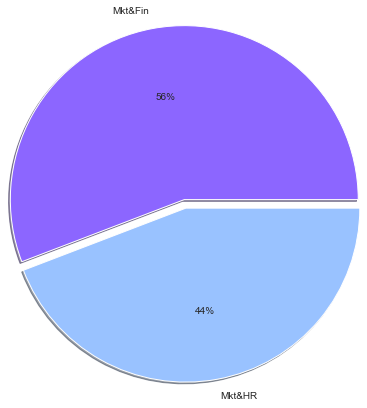

In [66]:
#to see the composition of Specialisation
out_df=pd.DataFrame(df.groupby('specialisation')['specialisation'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['specialisation'],labels=['Mkt&Fin','Mkt&HR'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

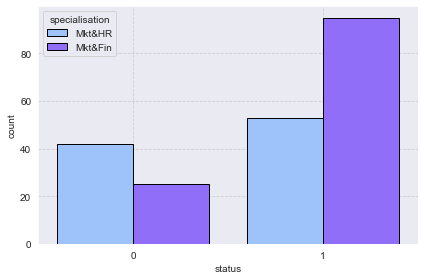

In [67]:
sns.countplot(df['status'],hue=df['specialisation'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [68]:
MH_placed=53
Total_MH=95
MH_placed_prop=MH_placed/Total_MH


MF_placed=95
Total_MF=120
MF_placed_prop=MF_placed/Total_MF

print('Proportion of student from Market and HR got placed: ') , 
print(MH_placed_prop)

print('\nProportion of students from Market and finance got placed: ') , 
print(MF_placed_prop)


Proportion of student from Market and HR got placed: 
0.5578947368421052

Proportion of students from Market and finance got placed: 
0.7916666666666666


From above plots and calculation 
* Marketing and Finance Specialization is Most Demanded by Corporate.


## Does school Board really matters?

**SSC board**

In [69]:
df.groupby(['ssc_b','status']).count()['salary']

ssc_b    status
Central  0         38
         1         78
Others   0         29
         1         70
Name: salary, dtype: int64

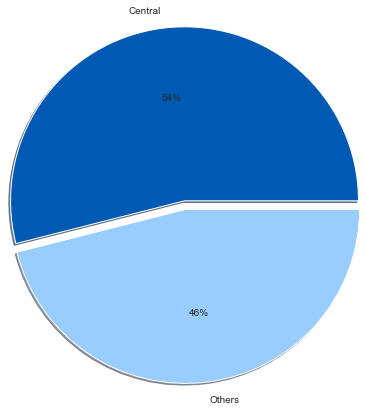

In [72]:
#to see the composition of ssc_b
out_df=pd.DataFrame(df.groupby('ssc_b')['ssc_b'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['ssc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

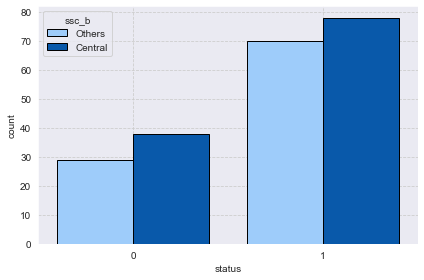

In [76]:
sns.countplot(df['status'],hue=df['ssc_b'],palette= ['#99ccff','#0059b3'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [77]:
print('Proportion of student having central board in SSC got placed: ') , 
print(78/(78+38))

print('\nProportion of students having other board in SSC got placed: ') , 
print(70/(70+29))


Proportion of student having central board in SSC got placed: 
0.6724137931034483

Proportion of students having other board in SSC got placed: 
0.7070707070707071


**HSC board**

In [78]:
df.groupby(['hsc_b','status']).count()['salary']

hsc_b    status
Central  0         27
         1         57
Others   0         40
         1         91
Name: salary, dtype: int64

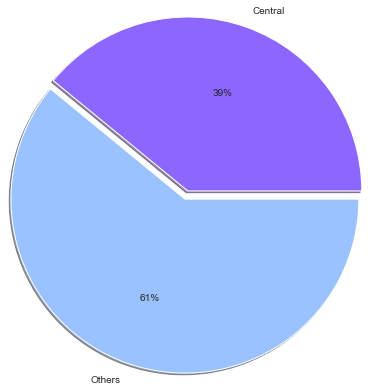

In [80]:
#to see the composition of hsc_b
out_df=pd.DataFrame(df.groupby('hsc_b')['hsc_b'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['hsc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

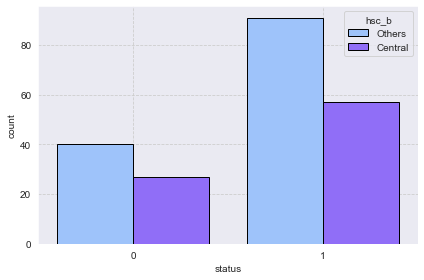

In [81]:
sns.countplot(df['status'],hue=df['hsc_b'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [82]:
print('Proportion of student having central board in HSC got placed: ') , 
print(57/(57+27))

print('\nProportion of students having other board in HSC got placed: ') , 
print(91/(91+40))


Proportion of student having central board in HSC got placed: 
0.6785714285714286

Proportion of students having other board in HSC got placed: 
0.6946564885496184


We got the following insights from the above graphs and calculations:-
 




 **Percentage of students got placed from:**
* Central board in **SSC** : 67%
* Other board in **SSC** : 71%
* Central board in **HSC** : 67%
* Other board in **HSC** : 69%


We can see here that there is not significant difference between selecting board in SSC or HSC will help you getting placed. So it doesn't matter whether you you did your education form central board or other board.

## Does Stream of HSC matters?

In [83]:
df.groupby(['hsc_s','status']).count()['salary']

hsc_s     status
Arts      0          5
          1          6
Commerce  0         34
          1         79
Science   0         28
          1         63
Name: salary, dtype: int64

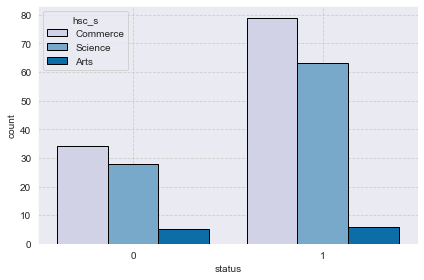

In [85]:
sns.countplot(df['status'],hue=df['hsc_s'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [86]:
print('Proportion of commerce student got placed: ') , 
print(79/(79+34))

print('\nProportion of science students got placed: ') , 
print(63/(63+28))


Proportion of commerce student got placed: 
0.6991150442477876

Proportion of science students got placed: 
0.6923076923076923


Its better to opt for Commerce or Science,but commerce stream will be benefcial as it will help a student to build strong foundation in Business studies. Students from Arts are very few therefore we are ignoring them. 

## Degree Type

In [87]:
df.groupby(['degree_t','status']).count()['salary']

degree_t   status
Comm&Mgmt  0          43
           1         102
Others     0           6
           1           5
Sci&Tech   0          18
           1          41
Name: salary, dtype: int64

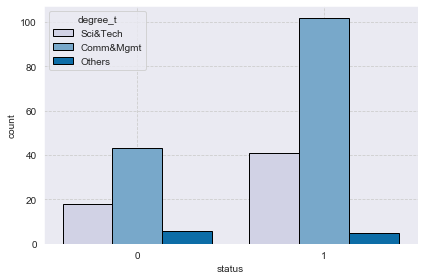

In [88]:
sns.countplot(df['status'],hue=df['degree_t'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [89]:
print('Proportion of Comm&Mgmt student got placed: ') , 
print(102/(43+102))

print('\nProportion of Sci&Tech students got placed: ') , 
print(41/(41+18))


Proportion of Comm&Mgmt student got placed: 
0.7034482758620689

Proportion of Sci&Tech students got placed: 
0.6949152542372882


Same as that of HSC stream.
Its better to opt for Comm&Mgmt or Sci&Tech,but comm&Mgmt stream will be benefcial. Students from others are very few therefore we are ignoring them.

# So, who are the students who are more likely to get placed?

* Class 10 and class 12 percentage should be greater than 60% from any board
* You should have opted for commerce in HSC (science will also work)
* Degree from Commerce and managemnet will help you (Science and Tech will also work)
* Having work experience is like strawberry on cake. Students having work experience are more likley to get placed



# Data Preprocessing

**Coverting categorical columns to dummy variables**

In [98]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

**Selecting relevant columns which determines whether a student is placed or not**

In [99]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [100]:
df_x=df[[ 'ssc_p', 'hsc_p',  'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]

In [101]:
for i in df_x.columns:
    if df_x[i].dtype ==object:
        print(i)
        df_x =cat_to_num(df_x,i)

hsc_s
degree_t
workex
specialisation


In [102]:
df_x.drop(['workex','specialisation','hsc_s','degree_t'],inplace =True,axis =1)

In [103]:
y = df['status']
X = df_x

**Splitting into training set and test test**

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model Fitting

In [166]:
scores = []

**Fitting logistic regression**

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=12)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'LogisticRegression',
        'score': model.score(X_test,y_test)
    })

model.score(X_test,y_test)

0.9534883720930233

**Fitting random forest**

In [169]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [170]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'RandomForestClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.9069767441860465

**Fitting Decision Tree**

In [171]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [172]:
pred=model.predict(X_test)

scores.append({
        'model': 'DecisionTreeClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.813953488372093

**Fitting XG-Boost**

In [173]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(random_state= 12)
model.fit(X_train, y_train)

[17:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=1, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', random_state=12, reg_alpha=0,
                reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
                tree_method='exact', use_label_encoder=True,
                validate_parameters=1, verbosity=None)

In [174]:
pred=model.predict(X_test)

scores.append({
        'model': 'XGBRFClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.8604651162790697

# Conclusion

In [177]:
Score = pd.DataFrame(scores,columns=['model','score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score
0,LogisticRegression,0.953488
1,RandomForestClassifier,0.906977
3,XGBRFClassifier,0.860465
2,DecisionTreeClassifier,0.813953


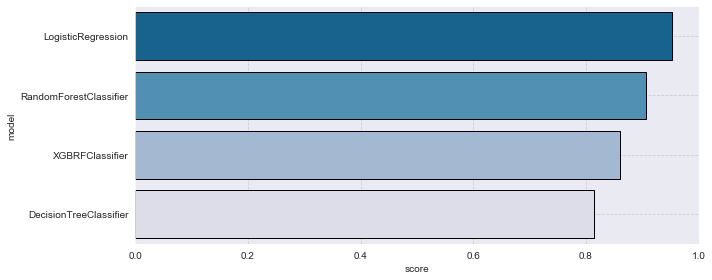

In [180]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['score'],palette='PuBu_r',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

**Logistic regression is giving the best result here**

# THANK YOU!!!